In [ ]:
# https://jakevdp.github.io/PythonDataScienceHandbook/

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train.csv")

In [ ]:
print(train.sample(5).to_string())

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
1399  1400          50       RL         51.0     6171   Pave   NaN      Reg         Lvl    AllPub  

In [ ]:
# Outliers 

train.drop(train.loc[(train["OverallQual"] < 5) & (train["SalePrice"] > 200000)].index, inplace=True)

In [ ]:
train.drop(train.loc[(train["GrLivArea"] > 4500) & (train["SalePrice"] < 300000)].index, inplace=True)

In [ ]:
# FillNa

In [ ]:
train["MSSubClass"] = train["MSSubClass"].astype('object')

In [ ]:
train["YrSold"] = train["YrSold"].astype('object')
train["MoSold"] = train["MoSold"].astype('object')

In [ ]:
train.isna().sum().sort_values(ascending=False)

PoolQC         1451
MiscFeature    1403
Alley          1366
Fence          1176
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
train["Electrical"] = train["Electrical"].fillna('SBrkr')

In [ ]:
train["KitchenQual"] = train["KitchenQual"].fillna('TA')

In [ ]:
train["Exterior1st"] = train["Exterior1st"].fillna(train["Exterior1st"].mode()[0])

In [ ]:
train["Exterior2nd"] = train["Exterior2nd"].fillna(train["Exterior2nd"].mode()[0])

In [ ]:
train["SaleType"] = train["SaleType"].fillna(train["SaleType"].mode()[0])

In [ ]:
train.isna().sum().sort_values(ascending=False)

PoolQC         1451
MiscFeature    1403
Alley          1366
Fence          1176
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
train["PoolQC"] = train["PoolQC"].fillna('None')

In [ ]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
  train[col] = train[col].fillna(0)

In [ ]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  train[col] = train[col].fillna('None')

In [ ]:
# NaN values for these categorical basement features, means there's no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
  train[col] = train[col].fillna('None')

In [ ]:
train["LotFrontage"].isna().sum()

258

In [ ]:
train.groupby("Neighborhood").agg(mean_lf = ("LotFrontage", "mean"), median_lf = ("LotFrontage", "median"))

,mean_lf,median_lf
Neighborhood,,
Blmngtn,47.142857,43.0
Blueste,24.000000,24.0
BrDale,21.562500,21.0
BrkSide,57.509804,52.0
ClearCr,83.461538,80.0
CollgCr,71.682540,70.0
Crawfor,71.804878,74.0
Edwards,64.811111,64.5
Gilbert,79.877551,65.0


In [ ]:
train.loc[train["LotFrontage"].isna(), ["LotFrontage", 'Neighborhood']]

,LotFrontage,Neighborhood
7,NaN,NWAmes
12,NaN,Sawyer
14,NaN,NAmes
16,NaN,NAmes
24,NaN,Sawyer
...,...,...
1429,NaN,NWAmes
1431,NaN,NPkVill
1441,NaN,CollgCr
1443,NaN,BrkSide


In [ ]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [ ]:
train.loc[train["Neighborhood"] == "NWAmes", ["Neighborhood", 'LotFrontage']]

,Neighborhood,LotFrontage
7,NWAmes,80.0
100,NWAmes,80.0
109,NWAmes,105.0
124,NWAmes,48.0
135,NWAmes,80.0
...,...,...
1409,NWAmes,46.0
1420,NWAmes,90.0
1429,NWAmes,80.0
1439,NWAmes,80.0


In [ ]:
train.isna().sum().sort_values(ascending=False)

MiscFeature    1403
Alley          1366
Fence          1176
FireplaceQu     690
MasVnrType        8
               ... 
ExterCond         0
ExterQual         0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
for col in train.select_dtypes('object'):
  train[col] = train[col].fillna('None')

In [ ]:
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

In [ ]:
train.isna().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [ ]:
# dependent variable
train["SalePrice2"] = train["SalePrice"]
train["SalePrice"] = np.log1p(train["SalePrice"])

In [ ]:
train = train.drop(columns=["Id"])

In [ ]:
num_cols = train.select_dtypes(['int64', 'float64']).columns

In [ ]:
import seaborn as sns

In [ ]:
print(train.loc[train["LotArea"] >= 100000].to_string())

     MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  SalePrice2
249          50       RL         80.0   159000   Pave  None      IR2         Low    AllPub   Cu

In [ ]:
train.drop(train.loc[train["LotArea"] >= 100000].index, inplace = True)

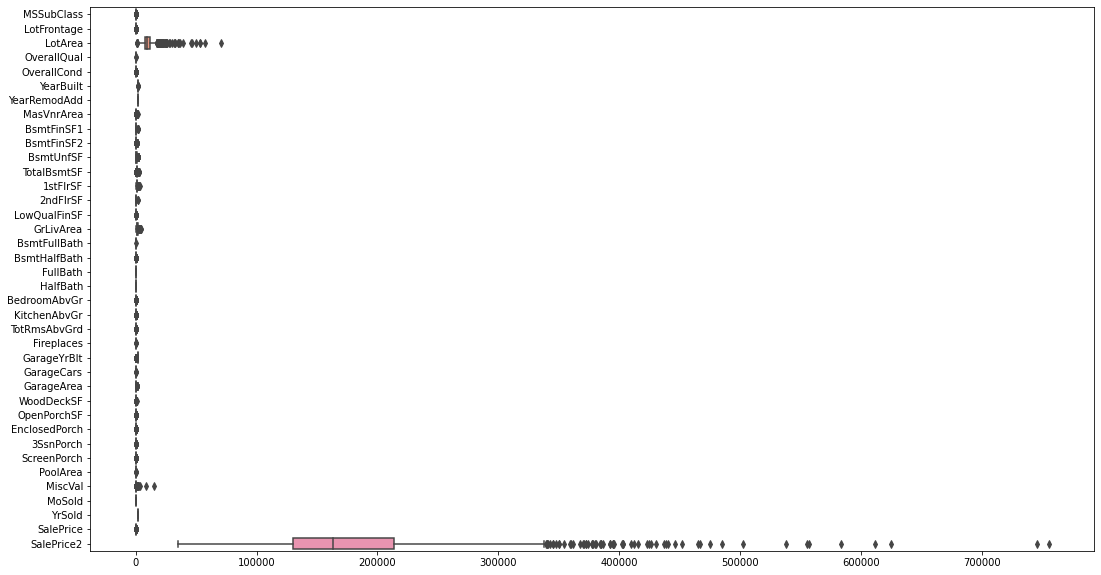

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data = train[num_cols], orient='h' )

In [ ]:
from scipy.stats import skew

In [ ]:
skew = train[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [ ]:
high_skew = skew[skew > 0.5]

In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [ ]:
for i in high_skew.index:
  train[i] = boxcox1p(train[i], boxcox_normmax(train[i] + 1))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


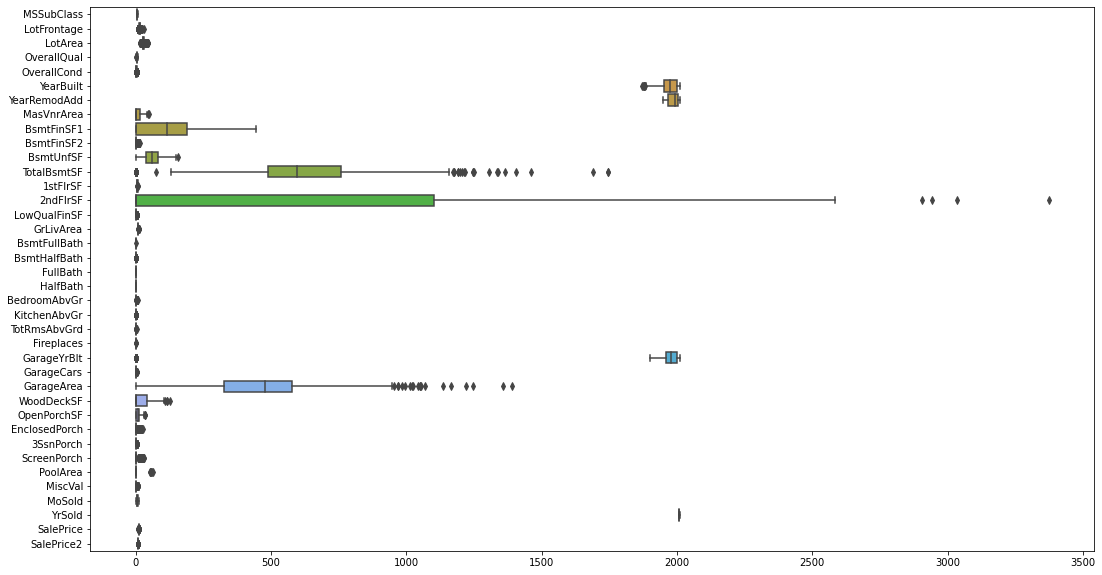

In [ ]:
plt.figure(figsize=(18, 10))
sns.boxplot(data = train[num_cols], orient='h' )

In [ ]:
train["BsmtFinType1"].value_counts()

Unf     430
GLQ     415
ALQ     218
BLQ     147
Rec     132
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [ ]:
train.groupby("BsmtFinType1")["SalePrice"].mean()

BsmtFinType1
ALQ     11.947497
BLQ     11.863660
GLQ     12.302371
LwQ     11.881361
None    11.529691
Rec     11.847710
Unf     11.964004
Name: SalePrice, dtype: float64

In [ ]:
# Feature Generation 
# Create new feature while giving more power precedence to a category of data 
train["BsmtFinType1_unf"] =  1 * (train["BsmtFinType1"] == 'Unf')

In [ ]:
train["HasWoodDeck"] = 1* ( train["WoodDeckSF"] >= 0)

In [ ]:
train["YearSinceRemodel"] = train["YrSold"] - train["YearRemodAdd"]

In [ ]:
train["Total_Home_Quality"] = train["OverallQual"] + train["OverallCond"]

In [ ]:
train.drop(columns = ["Utilities", 'Street', 'PoolQC'], inplace=True)

In [ ]:
train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]

In [ ]:
del train["SalePrice2"]

In [ ]:
train2 = pd.get_dummies(train).reset_index(drop=True)

In [ ]:
train2.shape

(1453, 299)

In [ ]:
train2 = train2.loc[:, ~train2.columns.duplicated()]

In [ ]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, scale, StandardScaler, RobustScaler
from sklearn.pipeline import make_pipeline


In [ ]:
# DL train, val, test
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [ ]:
train2.shape[0]

1453

In [ ]:
X = train2.drop(columns=["SalePrice"])

In [ ]:
Y = train2["SalePrice"]

In [ ]:
def rmsle(y, y_pred):
  return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
def cv_rmse(model, X=X):
  rmse = np.sqrt(-cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kf))
  return (rmse)

In [ ]:
# import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

In [ ]:
from mlxtend.regressor import StackingCVRegressor

In [ ]:
lgbm = LGBMRegressor(objective='regression', num_leaves=6, learning_rate=0.01)

In [ ]:
svr = make_pipeline(RobustScaler(), SVR(C=20, epsilon=0.008, gamma=0.0003))

In [ ]:
stack_gen = StackingCVRegressor(regressors=[lgbm, svr], meta_regressor=lgbm)

In [ ]:
score = cv_rmse(lgbm)

In [ ]:
score

array([0.23819414, 0.24489565, 0.1983266 , 0.26033124, 0.21246691,
       0.23754997, 0.24836951, 0.23585231, 0.24290789, 0.23779225])

In [ ]:
score.mean()

0.23566864697554055

In [ ]:
score.std()

0.016894703065044137

In [ ]:
score = cv_rmse(svr)

In [ ]:
score.mean()

0.11265033463845282

In [ ]:
score.std()

0.017745673527721648

In [ ]:
stack_gen_model = stack_gen.fit(np.array(X), np.array(train2["SalePrice"]))

In [ ]:
y_pred = stack_gen_model.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
rmsle(Y, y_pred)

0.18382496015629762